In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/training_data.csv')

In [6]:
X = df.drop(['resolution_time_group'], axis=1)
y = df['resolution_time_group']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)

In [8]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [9]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
labels = ['day','week','month','year','> year']

Accuracy: 0.7315098716763193


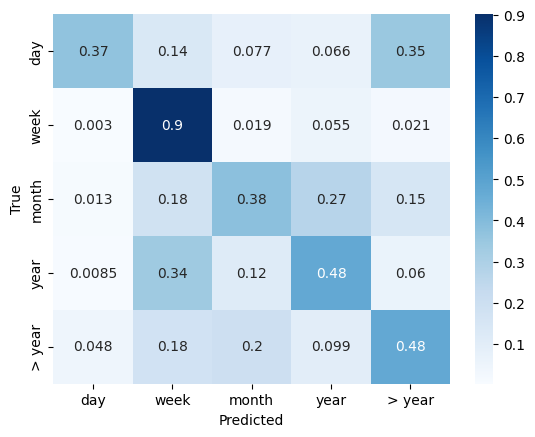

In [11]:
predicitions = rfc.predict(X_test)

score = rfc.score(X_test, y_test)

print(f'Accuracy: {score}')

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicitions, normalize='true')

sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [12]:
# feature importance

importances = rfc.feature_importances_

importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

importance_df.sort_values('importance', ascending=False, inplace=True)

importance_df

,feature,importance
4,queue,0.233178
0,case_title,0.161178
3,type,0.146227
13,precinct,0.108561
2,reason,0.066473
15,source,0.065179
5,department,0.048249
1,subject,0.044456
12,ward,0.035139
14,location_zipcode,0.022266
